In [1]:
import pandas as pd
#Used for data manipulation and analysis

import numpy as np

import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

import itertools

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df=pd.read_excel('../data/Constraint_Train.xlsx')
#Read an Excel file into a pandas DataFrame

In [3]:
df.head()
#Prints top 5 rows of excel file

,id,tweet,label
0,1.0,The CDC currently reports 99031 deaths. In gen...,real
1,2.0,States reported 1121 deaths a small rise from ...,real
2,3.0,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4.0,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5.0,Populous states can generate large case counts...,real


In [4]:
df=df.dropna()
#Drops the rows containing Null values

In [5]:
X=df.drop('label',axis=1)
#Drops the independent features, and stores it into X

In [6]:
#y=np.array(df['label'].values.tolist())
#Drops the dependent features, and stores it into y
y=df['label']
type(y)
arr=[]
for i in y:
    if i=='real':
        arr.append([1])
    else:
        arr.append([0])
y=arr

In [7]:
X.shape
#This returns the number of rows and columns as a tuple

(6420, 2)

In [8]:
#y.shape
#This returns the number of rows as a tuple

In [9]:
#y.values.reshape(6420,)

In [10]:
import tensorflow as tf
#It can be used across a range of tasks but has a particular focus
# on training and inference of deep neural networks

In [11]:
from tensorflow.keras.layers import Embedding
#embedding is a dense vector of floating point values
# (the length of the vector is a parameter that is specified).

from tensorflow.keras.preprocessing.sequence import pad_sequences
#To make each input length fixed

from tensorflow.keras.models import Sequential
#A Sequential model is appropriate for a plain stack of layers 
# where each layer has exactly one input tensor and one output tensor.

from tensorflow.keras.preprocessing.text import one_hot
#One-hot encodes a text into a list of word indexes of size n.
# It returns a list of encoded integers each corresponding to a word 
# (or token) in the given input string.

from tensorflow.keras.layers import LSTM
#Imports LSTM Classificatio model from Keras

from tensorflow.keras.layers import Dense
#Dense implements the operation:
# output = activation(dot(input, kernel) + bias). 
# These are all attributes of Dense. 

In [12]:
voc_size=5000
# Specify the vocabulary size, to be used later.

In [13]:
messages=X.copy()
#Copies the tuple X into variable messages

In [14]:
messages.reset_index(inplace=True)
#Reset the index, or a level of messages dataframe 
# to get a new order of arrangement.

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#It is a suite of libraries and programs for symbolic and statistical natural language 
# processing (NLP) for English written in the Python programming language. 

import re
#A regular expression (or RE) specifies a set of strings that matches it. The functions 
# in this module is to check if a particular string matches a given regular expression.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Dataset Preprocessing is done here
from nltk.stem.porter import PorterStemmer
#Algorithm to for removing the commoner morphological 
# and inflexional endings from words in English. 
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
#One-hot encodes a text into a list of word indexes of size n.
# It returns a list of encoded integers each corresponding to a word 
# (or token) in the given input string.

In [18]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0 4789 ... 2053  686  201]
 [   0    0    0 ...  560 1951 2305]
 [   0    0    0 ... 4220 3126 2916]
 ...
 [   0    0    0 ... 2912  396 3746]
 [   0    0    0 ... 4772  591  478]
 [2884  781 3668 ...  115 1206 2305]]


In [35]:
# from tensorflow.keras.layers import Dropout
#Creating a model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(Dropout(0.3))
model.add(LSTM(100))
# model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
###### COmment again from here bhiru

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
#len(embedded_docs),y.shape

In [37]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [38]:
X_final.shape,y_final.shape

((6420, 20), (6420, 1))

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [40]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
68/68 [==============================] - 4s 32ms/step - loss: 0.4605 - accuracy: 0.7670 - val_loss: 0.3027 - val_accuracy: 0.8754
Epoch 2/15
68/68 [==============================] - 1s 22ms/step - loss: 0.1820 - accuracy: 0.9307 - val_loss: 0.2379 - val_accuracy: 0.9037
Epoch 3/15
68/68 [==============================] - 1s 22ms/step - loss: 0.0920 - accuracy: 0.9700 - val_loss: 0.2818 - val_accuracy: 0.9000
Epoch 4/15
68/68 [==============================] - 2s 23ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.3132 - val_accuracy: 0.8891
Epoch 5/15
68/68 [==============================] - 2s 23ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.4332 - val_accuracy: 0.8882
Epoch 6/15
68/68 [==============================] - 2s 24ms/step - loss: 0.0193 - accuracy: 0.9947 - val_loss: 0.4565 - val_accuracy: 0.8815
Epoch 7/15
68/68 [==============================] - 2s 25ms/step - loss: 0.0237 - accuracy: 0.9949 - val_loss: 0.4012 - val_accuracy: 0.8867
Epoch 8/15
68

In [41]:
from tensorflow.keras.layers import Dropout
## Creating model
#embedding_vector_features=40
#model=Sequential()
#model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
#model.add(LSTM(100))
# model.add(Dropout(0.3))
#model.add(Dense(1,activation='sigmoid'))
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
y_pred=(model.predict(X_test) >= 0.5).astype("int64")
#y_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [44]:
confusion_matrix(y_test,y_pred)

array([[867, 137],
       [117, 998]], dtype=int64)

In [45]:
type(y_test)

numpy.ndarray

In [46]:
type(y_pred)

numpy.ndarray

In [47]:
y_test

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [48]:
def create_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    to plot a sklearn confusion matrix(cm)

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    """
        Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
    """
    
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrRd') 
    """ 
        To select the colour theme of the confusion matrix
    """

    plt.figure(figsize=(5, 4))
    """
        To create a figure with the given width, height in inches.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    """
       To display data as an image, i.e., on a 2D regular raster.
    """
    
    plt.title(title)
    plt.colorbar()
    """
       To display a title and colorbar on the axes.
    """
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    """
        To put the labels on the confusion matrix, with or without rotation.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    """
        To normalize the confusion matrix by slicing and adding a new axis.
    """


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    """
        To calculate the threshold by finding the maximum value in confusion matrix.
    """
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    """
        To display the values in the confusion matrix with different colours and precision.
    """

    plt.tight_layout()
    """
        This automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
    """
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    """
        To plot the the labels on their respective axes.
    """
    
    plt.show()
    """
        To show the confusion matix on screen.
    """

In [49]:
def print_metrices(y_pred,y_test):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred,))
    print("Accuracy : ",accuracy_score(y_pred,y_test))
    print("Precison : ",precision_score(y_pred,y_test, average = 'weighted'))
    print("Recall : ",recall_score(y_pred,y_test,  average = 'weighted'))
    print("F1 : ",f1_score(y_pred,y_test,  average = 'weighted'))
    """
        Here, we are printing the confusion matrix, its accuracy, precision, recall and F1 score.
    """

LSTM
val:
[[867 137]
 [117 998]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1004
           1       0.88      0.90      0.89      1115

    accuracy                           0.88      2119
   macro avg       0.88      0.88      0.88      2119
weighted avg       0.88      0.88      0.88      2119

Accuracy :  0.8801321378008494
Precison :  0.8804296502863702
Recall :  0.8801321378008494
F1 :  0.8802023487999466


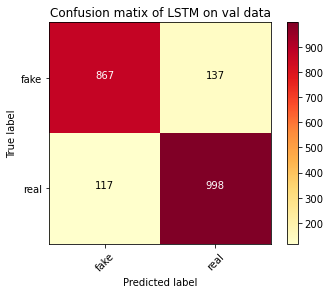

"\n    Transform the data from the excel sheet which are not under 'label' \n    column and apply predict with the final estimator.\n\n    This will be used later to print additional informations, like data types and memory used.\n"

In [50]:
print('LSTM')
print ('val:')
print_metrices(y_pred,y_test)

create_confusion_matrix(confusion_matrix(y_test,y_pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LSTM on val data')

"""
    Transform the data from the excel sheet which are not under 'label' 
    column and apply predict with the final estimator.

    This will be used later to print additional informations, like data types and memory used.
"""
